## EDA Clinica Veterinaria

El siguiente proyecto trata de analizar los datos recogidos por una clinica veterinaria especializada en rehabilitación 
durante más de tres años con más de 400 pacientes. La rehabilitación es una disciplina dentro de la veterinaria todavía
desconocida para muchos. Esta especialidad trata de aliviar dolor proveniente de lesiones que aparecen de manera geriátrica, 
por accidentes o de manera postoperatoria, entre otras tantas.

El objetivo del EDA, a petición de la clínica es poder responder a las siguientes preguntas:


-	¿Qué podemos decir del paciente más común?
-	¿El tipo de lesión está relacionado con la raza?
-	¿Hay conexión entre la raza, edad y el sexo del perro?
-	¿El ingreso económico por paciente tiene que ver con la edad o con la raza?

#### 1. Extracción de los datos
- Los datos se han extraido del software que utiliza la clinica para registrar a los pacientes
- En el notebook "/Notebooks/clean_data.ipynb" se han tratado los datos extraidos, donde se han manipulado los nulos en concordancia con la clinica para alterar lo menos posible los resultados, se han guardado los datos limpios en un csv que se puede encontrar en "/data/datos_vibra_limpios.csv


#### 2. Análisis Univariante
- El análisis se ha hecho primeramente de manera univariante, tratando cada columna por separado, empezando primero por las variables numéricas seguido de las categóricas. 

#### 3. Análisis Bivariante
- Posteriormente se ha hecho el análisis bivariante para relacionar las columnas de interés para la clínica y poder seguir
sacando conclusiones.

##### A Continuación se detallan los análisis

##### Analisis Univariante:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("./src/data/datos_vibra_limpios.csv", sep = ";")
df

,Id,Especie,Nombre,Raza,Sexo,Edad,Diagnostico 1,Gasto_rehabilitacion,Gasto_tienda,Dieta,Tutor
0,1,Canina,Wateke,Mestizo,Macho,7,Acondicionamiento,0.00,0.0,0.0,Mujer
1,2,Canina,Cuco,Chihuahua,Macho,19,Artrosis,274.63,0.0,0.0,Mujer
2,3,Canina,Emma,Mestizo,Hembra,15,Artrosis,255.00,0.0,0.0,Mujer
3,4,Canina,Jalito,Yorkshire Terrier,Macho,12,Luxacion de Rotula,55.00,0.0,0.0,Mujer
4,5,Canina,Tote,Yorkshire Terrier,Macho,12,Artrosis,55.00,0.0,0.0,Mujer
...,...,...,...,...,...,...,...,...,...,...,...
413,416,Canina,Sally,Galgo,Hembra,1,Acondicionamiento,70.00,0.0,0.0,Mujer
414,417,Canina,Rufus,Golden Retriever,Macho,2,Displasia Cadera,70.00,0.0,0.0,Mujer
415,418,Canina,Golfo,Teckel,Macho,4,Acondicionamiento,70.00,0.0,0.0,Mujer
416,419,Canina,Nola,Pastor Alemán,Hembra,9,Displasia Cadera,70.00,2.0,0.0,Mujer


Columnas Gasto en rehabilitación y en tienda

In [2]:
df[["Gasto_rehabilitacion", "Gasto_tienda"]].describe()

,Gasto_rehabilitacion,Gasto_tienda
count,418.000000,418.000000
mean,422.855598,14.648895
std,540.641847,121.782159
min,0.000000,0.000000
25%,70.000000,0.000000
50%,295.000000,0.000000
75%,520.000000,0.000000
max,4672.850000,2256.730000


In [3]:
df_cv = df[["Gasto_rehabilitacion", "Gasto_tienda"]].describe().loc[["std", "mean"]].T
df_cv["Coeficiente_variabilidad"] = df_cv["std"] / df_cv["mean"]
df_cv

,std,mean,Coeficiente_variabilidad
Gasto_rehabilitacion,540.641847,422.855598,1.278550
Gasto_tienda,121.782159,14.648895,8.313403


- Columnas con una elevada variabilidad
- Veamos la distribucion de sus datos

c:\Users\Borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


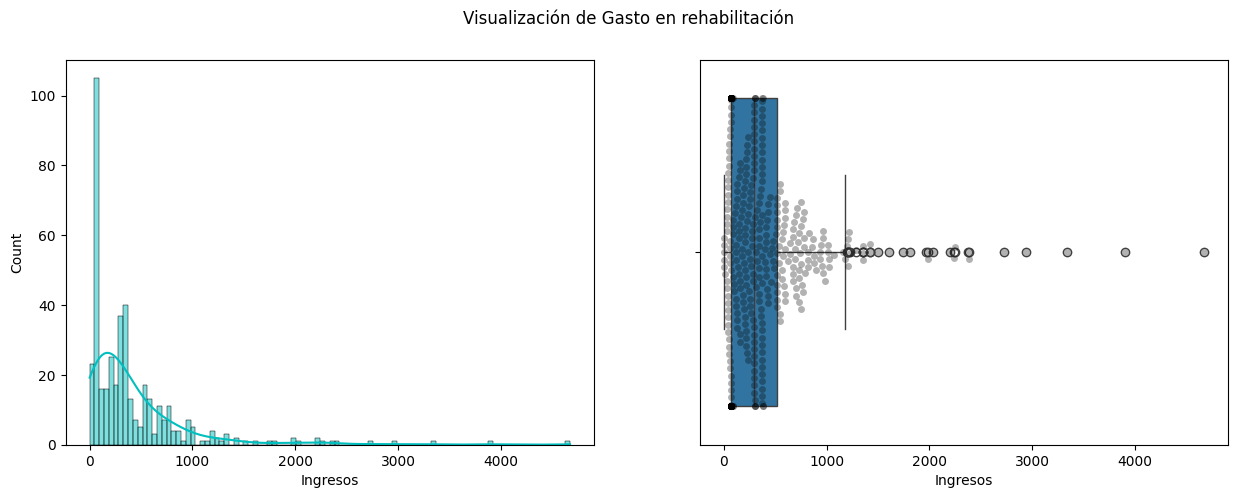

In [4]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de Gasto en rehabilitación")
sns.histplot(df["Gasto_rehabilitacion"],kde=True, color='c',bins=100, ax = axs[0]) 
axs[0].set_xlabel("Ingresos");
sns.boxplot(x = "Gasto_rehabilitacion", data = df, ax = axs[1]);
sns.swarmplot(x = "Gasto_rehabilitacion", data=df, color="black", ax=axs[1], alpha=0.3);
axs[1].set_xlabel("Ingresos");

- El 50% de los datos está por debajo de 300 euros.
- Aparecen outlayers a partir de 1200 euros aproximadamente

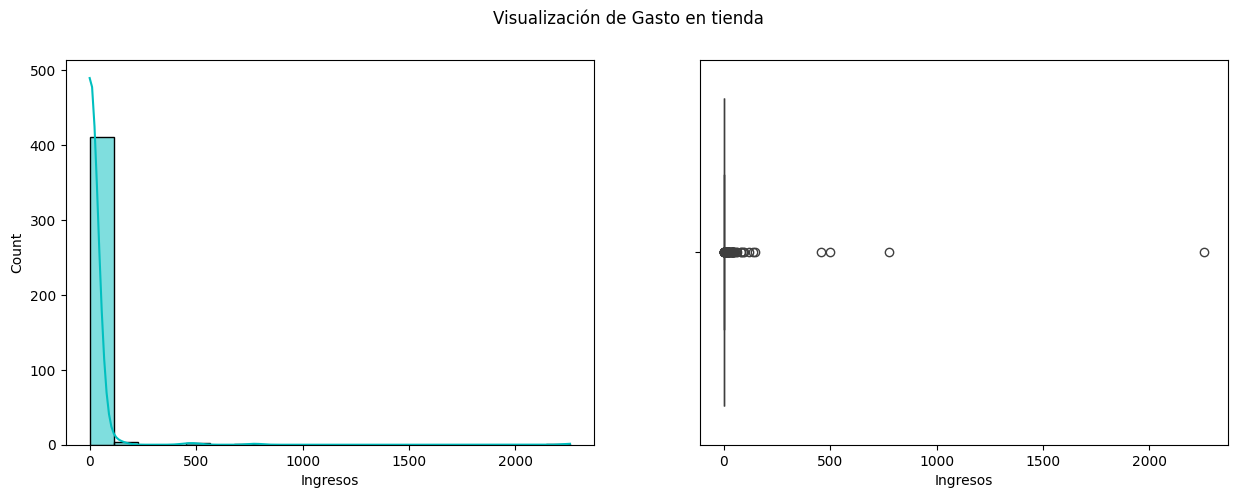

In [5]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de Gasto en tienda")
sns.histplot(df["Gasto_tienda"],kde=True, color='c',bins=20, ax = axs[0]) 
axs[0].set_xlabel("Ingresos");
sns.boxplot(x = "Gasto_tienda", data = df, ax = axs[1]);
axs[1].set_xlabel("Ingresos");

In [6]:
df.Gasto_tienda.value_counts()
print((320/418)*100)

76.55502392344498


- El cliente apenas consume producto de la tienda. A tener en cuenta para que no suponga un excedente en el flujo de caja de la empresa. El 76,5% de la clientela no consume en la tienda
- La fuente de ingresos principal de la clínica debe está en la parte de rehabilitación
- Hay que potenciar y visualizar la tienda para incrementar la facturación

Columna Edad

In [7]:
df.Edad.describe()

count    418.000000
mean       8.909091
std        4.376892
min        1.000000
25%        5.000000
50%        9.000000
75%       12.000000
max       20.000000
Name: Edad, dtype: float64

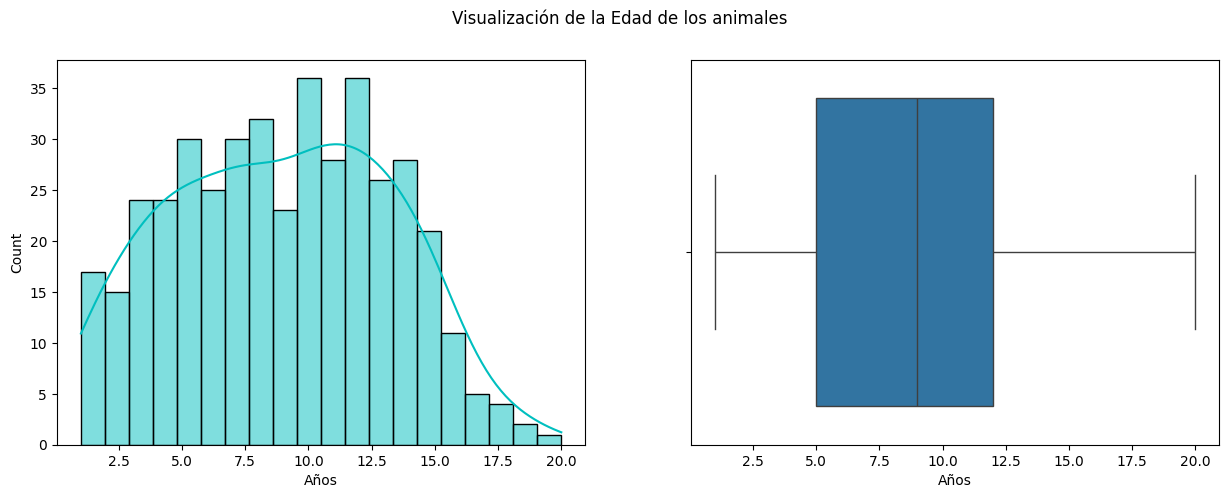

In [8]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de la Edad de los animales")
sns.histplot(df["Edad"],kde=True, color='c',bins=20, ax = axs[0]) 
axs[0].set_xlabel("Años");
sns.boxplot(x = "Edad", data = df, ax = axs[1]);
axs[1].set_xlabel("Años");

- En el histograma se aprecia como es mayoritaria la presencia de animales con edades entre los 10 y 12 años
- Tanto la media como la mediana indican edades practicamente iguales
- Podriamos decir que siendo que el rango de edad considerado donde las mascotas empiezan a considerarse jeriatricas es a partir de los 8 años, la afluencia de clientes 

Columnas categoricas Tutor, Sexo y Diagnostico

- Se importa un fichero con funciones para pintar graficas. Se encuentra en "./utils/bootcampviztools.py"

In [11]:
from bootcampviztools import pinta_distribucion_categoricas

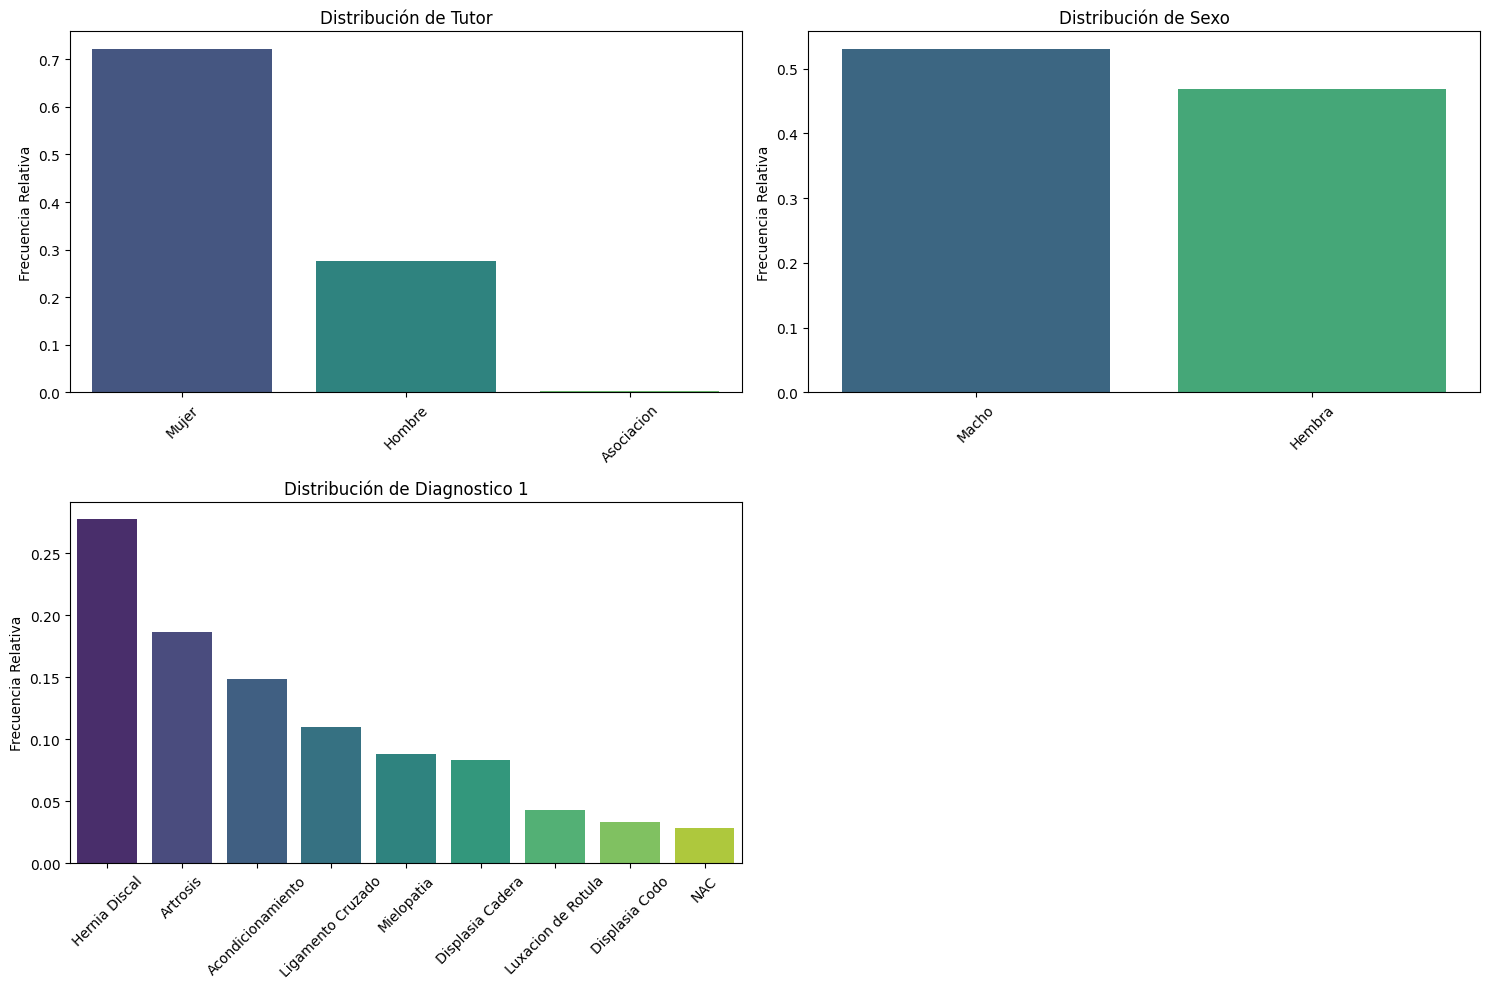

In [12]:
pinta_distribucion_categoricas(df, ["Tutor", "Sexo", "Diagnostico 1"], relativa=True)

C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\2301938230.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\2301938230.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\2301938230.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

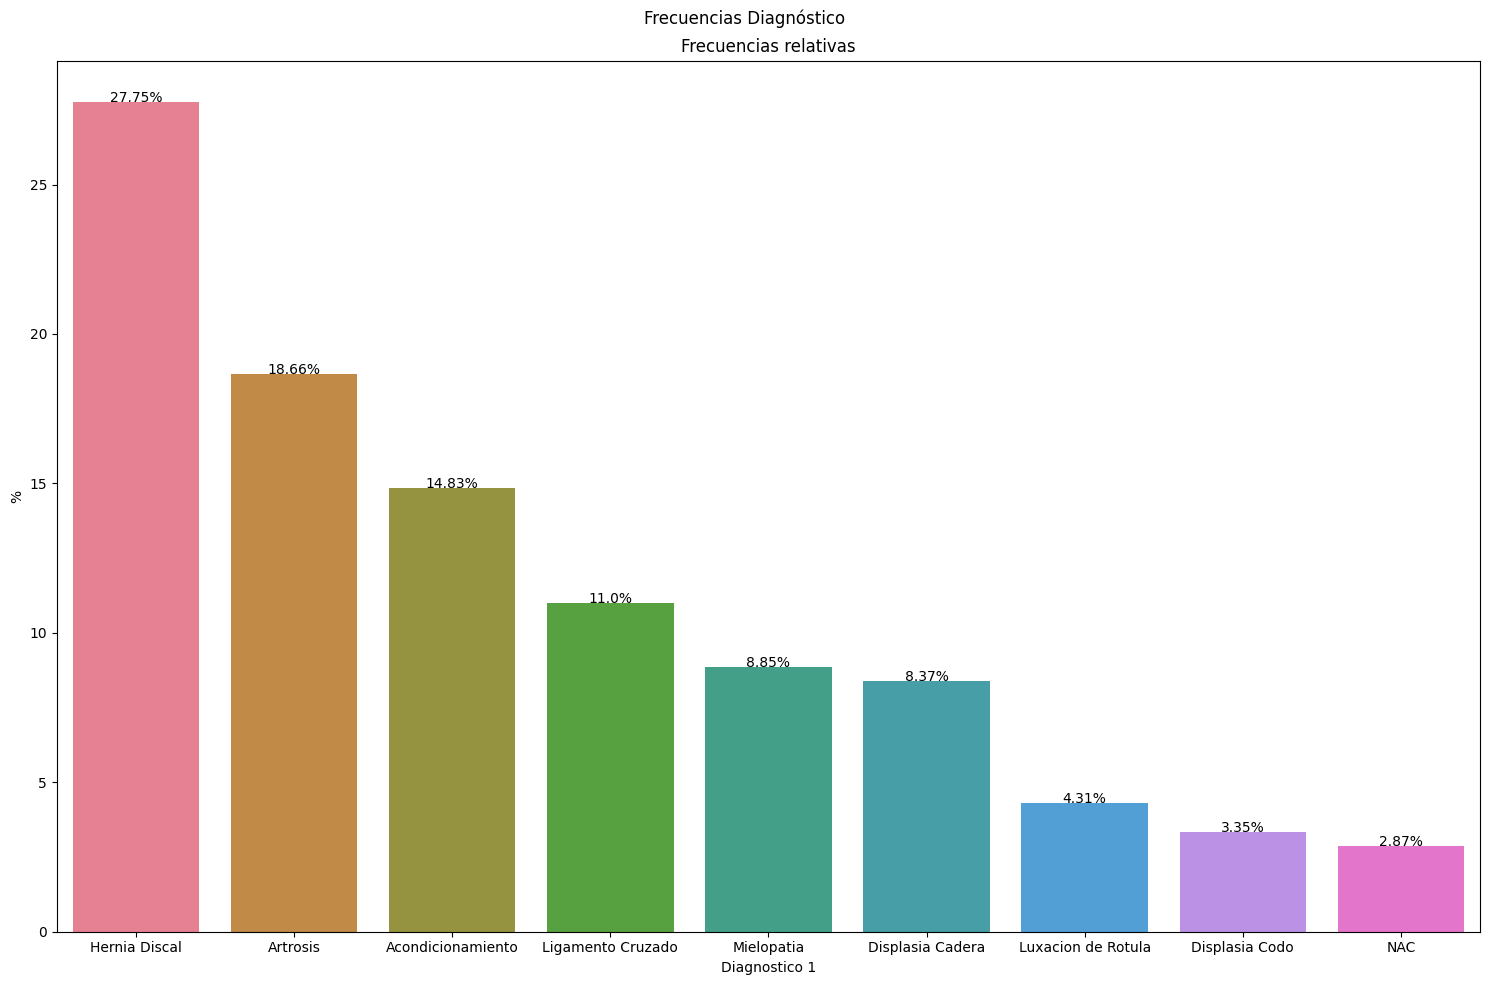

In [13]:
valores = df["Diagnostico 1"].value_counts(normalize = True) * 100
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
fig.suptitle("Frecuencias Diagnóstico")
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs, palette="husl")
axs.set_title("Frecuencias relativas")
axs.set_ylabel("%")
for i in range(len(valores)):
    axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")

plt.tight_layout();


- En torno al 70% de los dueños de las mascotas son mujeres
- La lesión que más se trata es la hernia discal con un 27,75%
- El sexo de la mascota tiene frecuencias muy similares tanto para machos como para hembras, lo que podria decirse que el sexo no es una variable importante para delimitar lesiones por raza

Se escogen las 7 razas que más pacientes alberguen y para ello se crea un dataframe nuevo que incluirá únicamente estas razas, con el cual se trabajará para encontrar y dar respuestas a preguntas iniciales. Las razas escogidas son por interés
veterinario ya que son las que acuden con mayor frecuencia

In [14]:
condicion1 = df["Raza"] == "Teckel"
condicion2 = df["Raza"] == "Border Collie"
condicion3 = df["Raza"] == "Pastor Alemán"
condicion4 = df["Raza"] == "Labrador Retriever"
condicion5 = df["Raza"] == "Bulldog Francés"
condicion6 = df["Raza"] == "Golden Retriever"
condicion7 = df["Raza"] == "Bichón"
df_razas = df.loc[condicion1 | condicion2 | condicion3 | condicion4 | condicion5 | condicion6 | condicion7]
df_razas

,Id,Especie,Nombre,Raza,Sexo,Edad,Diagnostico 1,Gasto_rehabilitacion,Gasto_tienda,Dieta,Tutor
11,12,Canina,Sonic,Border Collie,Macho,8,Ligamento Cruzado,1157.22,38.05,0.0,Mujer
13,14,Canina,Ulises,Pastor Alemán,Macho,12,Displasia Cadera,882.35,0.00,0.0,Mujer
15,16,Canina,Lia,Border Collie,Hembra,8,Hernia Discal,1355.00,18.20,0.0,Hombre
17,18,Canina,Adya,Pastor Alemán,Macho,15,Artrosis,1964.00,0.00,0.0,Mujer
22,23,Canina,Valpo,Teckel,Macho,7,Hernia Discal,1355.00,5.00,0.0,Mujer
...,...,...,...,...,...,...,...,...,...,...,...
410,413,Canina,Raiko,Pastor Alemán,Macho,9,Mielopatia,520.00,0.00,0.0,Hombre
414,417,Canina,Rufus,Golden Retriever,Macho,2,Displasia Cadera,70.00,0.00,0.0,Mujer
415,418,Canina,Golfo,Teckel,Macho,4,Acondicionamiento,70.00,0.00,0.0,Mujer
416,419,Canina,Nola,Pastor Alemán,Hembra,9,Displasia Cadera,70.00,2.00,0.0,Mujer


##### Analisis Bivariante

Análisis Raza-Edad

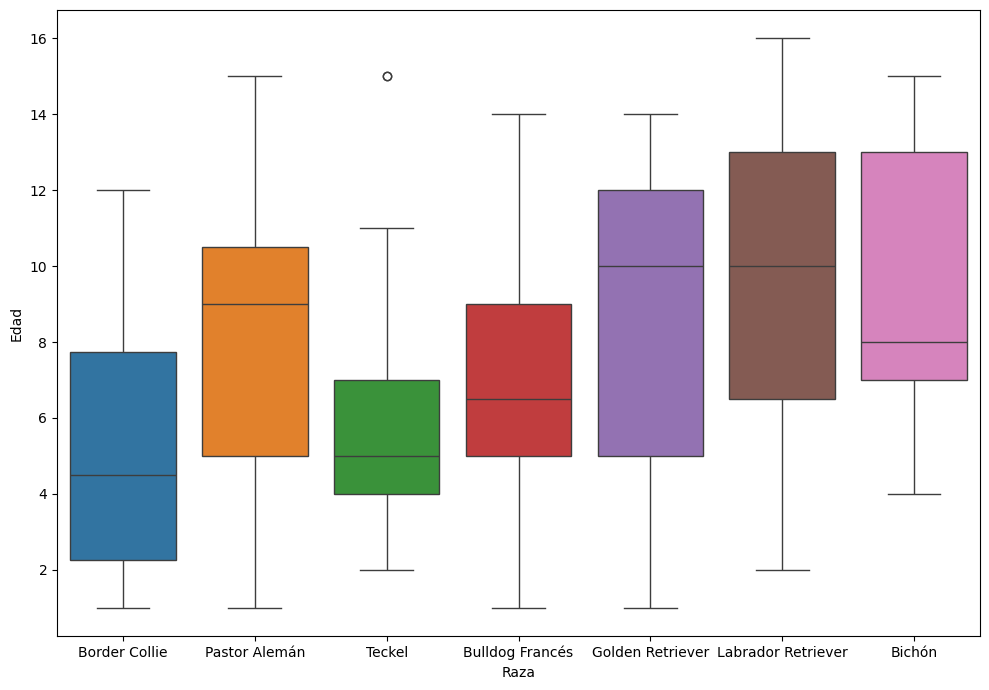

In [16]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(x = "Raza",
            y = "Edad",
            hue = "Raza",
            data=df_razas)
plt.tick_params(axis='x', rotation=0)
plt.tight_layout()



In [17]:
razas = df_razas["Raza"].unique()
edad_raza = [df_razas[df_razas["Raza"] == raza]["Edad"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*edad_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 4.0619689993294665
Valor p: 0.0009463221194506574


- El valor F indica que hay cierta variabilidad entre las razas que no puede explicarse por el azar solamente.
- El p valor menor a 0,01 significa que hay evidencia estadísticamente significativa para rechazar la hipotesis nula (las edades medias son iguales entre todas las razas)
- Estos resultados indican que la raza influye en la edad promedio de los pacientes. Es decir, la edad media difiere significativamente entre al menos algunas razas

In [18]:
variable_categorica = "Raza"
variable_numerica = "Edad"
df_razas.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,Raza,count,mean,std,min,25%,50%,75%,max
0,Bichón,13.0,9.461538,3.864699,4.0,7.00,8.0,13.00,15.0
1,Border Collie,22.0,5.090909,3.264661,1.0,2.25,4.5,7.75,12.0
2,Bulldog Francés,16.0,7.000000,3.265986,1.0,5.00,6.5,9.00,14.0
3,Golden Retriever,13.0,8.307692,4.819831,1.0,5.00,10.0,12.00,14.0
4,Labrador Retriever,19.0,9.631579,3.904563,2.0,6.50,10.0,13.00,16.0
5,Pastor Alemán,19.0,8.052632,3.718926,1.0,5.00,9.0,10.50,15.0
6,Teckel,28.0,6.250000,3.204453,2.0,4.00,5.0,7.00,15.0


- Las razas más jóvenes en acudir a terapia son los Teckel, Border Collie y el Bulldog Francés
- Los perros que peor envejecen podriamos decir que son los labradores y goldens seguidos de los pastores alemanes
- Veamos cuales son sus lesiones más típicas.

Analisis Raza-Diagnóstico

In [19]:
raza_lesiones = {}
for valor in df_razas["Raza"].unique():
    raza_lesiones[valor] = df_razas.loc[df_razas["Raza"] == valor, "Diagnostico 1"]

C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\1680378631.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\1680378631.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9768\1680378631.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

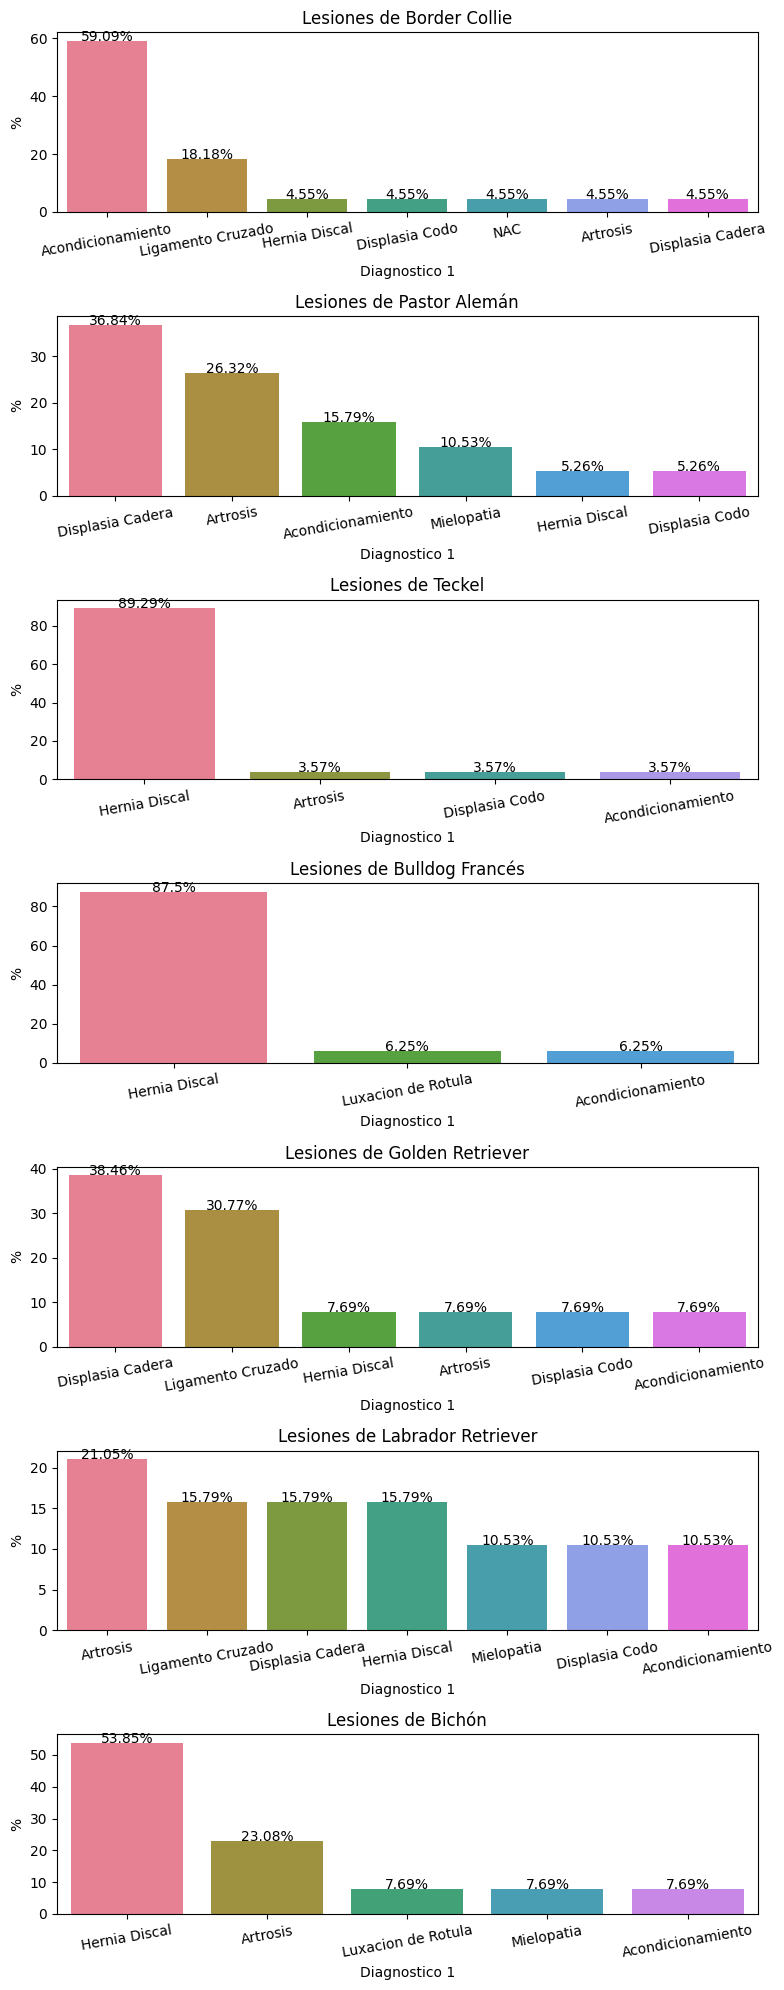

In [20]:
fig, axs = plt.subplots(nrows = 7, ncols = 1, figsize = (8,20))
n = 0
for clave, valor in raza_lesiones.items():
    
    valores = valor.value_counts(normalize = True) * 100
    sns.barplot(x = valores.index, y = valores.values, hue = valores.index, palette="husl", ax=axs[n])
    axs[n].set_title(f"Lesiones de {clave}")
    axs[n].set_ylabel("%")
    axs[n].tick_params(axis='x', rotation=10)
    for i in range(len(valores)):
        axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
    n += 1
plt.tight_layout();

- El gráfico de barras habla por si solo.
- Cada raza con sus lesiones más frecuentes. Destacar sobre todo los pacientes con Hernia Discal que representa porcentajes muy altos

Analisis Raza, Edad, Sexo

<Figure size 1000x1000 with 0 Axes>

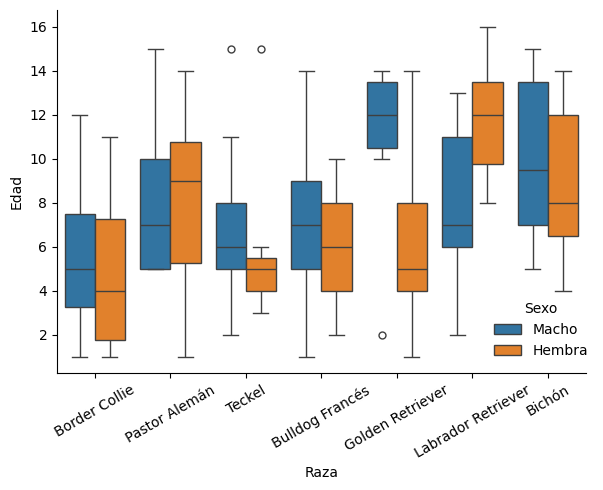

In [21]:
plt.figure(figsize=(10,10))
ax = sns.catplot(x = "Raza", y = "Edad", hue = "Sexo", data = df_razas, kind = "box")
sns.move_legend(ax, "lower right", bbox_to_anchor=(1,0.25))
plt.tick_params(axis='x', rotation=30)
plt.tight_layout();


- Como ya vimos de manera univariante, el sexo no parece ser una variable a tener en cuenta para los pacientes
- Hay notoriedad para los teckel y golden retriever donde hay mayormente machos
- En el labrador aparecen más hembras

Análisis Gasto en rehabilitación y Raza

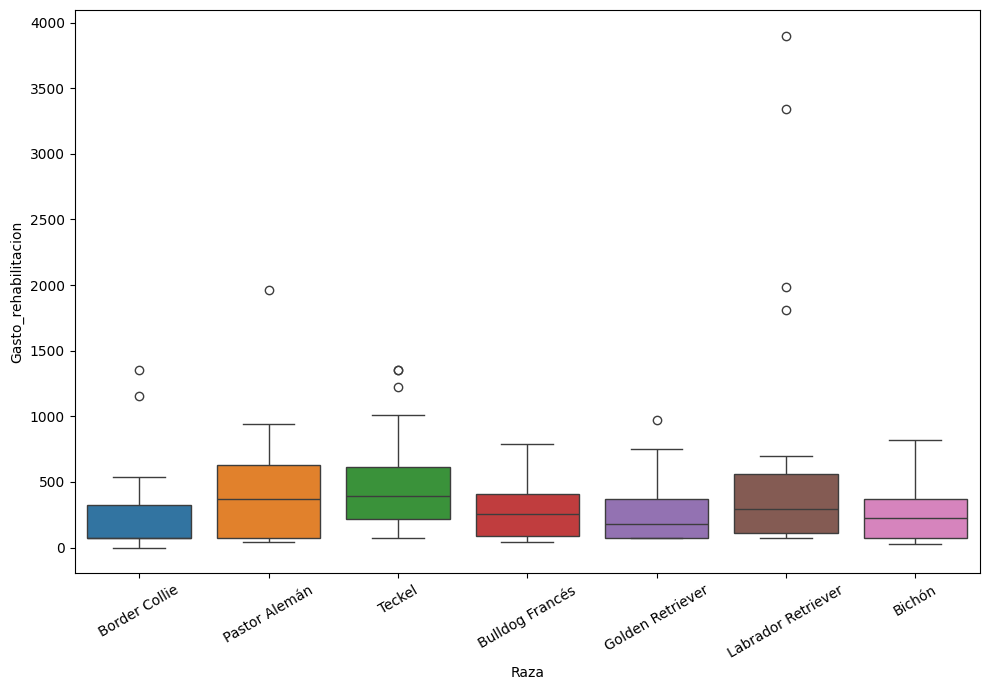

In [22]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(x = "Raza",
            y = "Gasto_rehabilitacion",
            hue = "Raza",
            data=df_razas)
plt.tick_params(axis='x', rotation=30)
plt.tight_layout();

- Veamoslo de manera numerica

In [23]:
variable_categorica = "Raza"
variable_numerica = "Gasto_rehabilitacion"
df_razas.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,Raza,count,mean,std,min,25%,50%,75%,max
0,Bichón,13.0,301.753846,261.837394,30.0,70.0,225.0,370.0000,820.0
1,Border Collie,22.0,250.269091,361.841732,0.0,70.0,70.0,326.2500,1355.0
2,Bulldog Francés,16.0,323.418750,276.359191,40.0,85.0,257.5,411.2500,790.0
3,Golden Retriever,13.0,298.615385,294.672852,70.0,70.0,180.0,370.0000,970.0
4,Labrador Retriever,19.0,781.381053,1140.960636,70.0,110.0,295.0,559.6100,3901.0
5,Pastor Alemán,19.0,441.654737,486.713253,40.0,70.0,370.0,627.5000,1964.0
6,Teckel,28.0,489.017857,374.518128,70.0,220.0,392.5,617.4875,1355.0


ANOVA para Raza (variable independiente) y gasto en rehabilitacion (variable dependiente)

In [24]:
razas = df_razas["Raza"].unique()
gasto_raza = [df_razas[df_razas["Raza"] == raza]["Gasto_rehabilitacion"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*gasto_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 2.0778117933270686
Valor p: 0.06052862976448055


- El p-valor está ligeramente por encima del umbral típico de significancia  de 0,05.
    - Esto significa que no se puede rechazar la hipotesis nula son seguridad, aunque se está cerca de poder hacerlo. No hay evidencia estadística significativa de que el gasto varie por raza, pero casi
- Valor f indica que hay algo de variabilidad en el gasto pero no lo sufieciente como para declarlo significativo con el nivel de confianza estándar (95%)
- Con un p-valor de 0.06, no hay evidencia suficiente para afirmar que el gasto promedio varía significativamente entre razas, aunque el resultado es marginal y podría considerarse tendencialmente significativo si se usara un umbral más laxo (como α = 0.10).

ANOVA para el total de razas (variable independiente) y gasto en rehabilitacion (variable dependiente) aunque el conjunto de datos por grupo es muy dispar

In [25]:
razas = df["Raza"].unique()
gasto_raza = [df[df["Raza"] == raza]["Gasto_rehabilitacion"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*gasto_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.5850908810235906
Valor p: 0.006977033477602193


- El p-valor indica que para la totalidad de los clientes, hay evidencia significativa de que la hipotesis nula de que la distribucion de los datos es igual entre grupos se rechaza y por tanto que la raza y el gasto por paciente tienen relación

Correlacion entre edad y gasto en rehabilitacion para las razas estudio

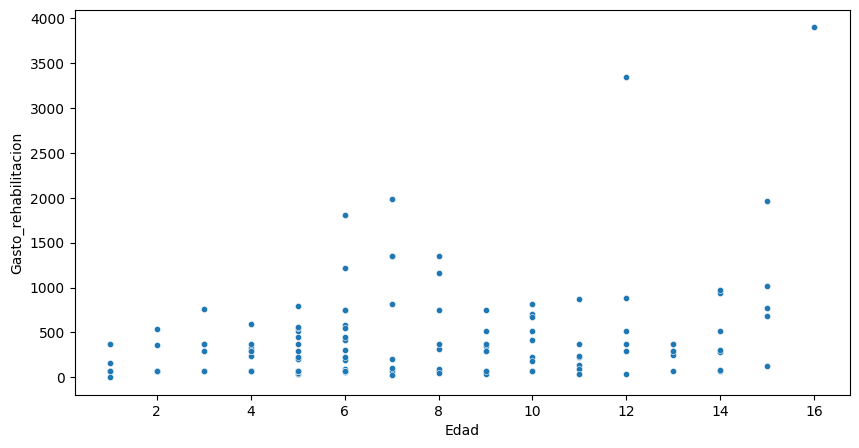

In [26]:
variable_numerica_1 = "Edad"
variable_numerica_2 = "Gasto_rehabilitacion"

fig = plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1, y= variable_numerica_2, data = df_razas, s=20);

In [27]:
from scipy.stats import pearsonr

pearsonr(df_razas["Edad"], df_razas["Gasto_rehabilitacion"])

PearsonRResult(statistic=np.float64(0.3155148394696244), pvalue=np.float64(0.0002556489258337112))

- De esta correlacion de Pearson con un p-valor inferior a 0.05, podriamos decir que existe una correlación positiva pero modera, lo que significa que se mueven en la misma dirección aunque la relación no es muy fuerte. El p-valor  bajo confirma que la relacion no se debe al azar. y se puede concluir que existe una relación estadísticamente significativa

Correlacion entre la edad y todas las razas

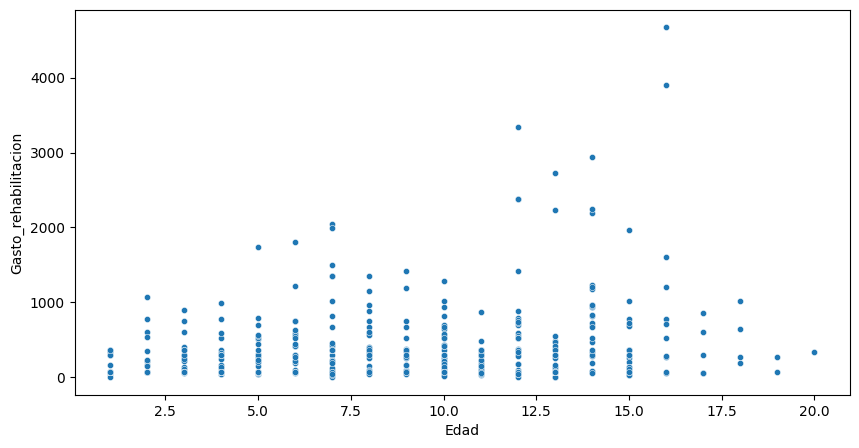

In [28]:
variable_numerica_1 = "Edad"
variable_numerica_2 = "Gasto_rehabilitacion"

plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1, y= variable_numerica_2, data = df, s=20);

In [29]:
pearsonr(df["Edad"], df["Gasto_rehabilitacion"])

PearsonRResult(statistic=np.float64(0.220857666055122), pvalue=np.float64(5.156096985504529e-06))

- En cambio, cuando utilizamos todos los clientes, la correlación existente aunque positiva pero débil, tiene un p-valor superior a 0.05 lo que indica que no es estadísticamente significativo. Por tanto, no hay suficiente evidencia para concluir que en el conjunto de los datos, exista una relación significativa entre las dos variables aunque hay una ligera tendencia a aumentar juntas

### Conclusiones

+ El principal cliente que acude a la clínica veterinaria tiene por tutor a una mujer, siendo la lesión más común la hernia discal y el sexo del perro es macho, aunque las frecuencias porcentuales de ambos sexos están cercanas al 50%.
+ Principalmente acuden perros mestizos, siendo la raza “Teckel” la mayoritaria seguida de “Border Collie” y “Pastor Alemán”.
+ Las razas objetivo de menor edad tienen muy marcada la lesión de “Hernia discal”, tanto para la raza “Teckel” como para el “Bulldog francés”, representando en ambas porcentajes muy cercanos al 90%. La raza “Bichón” con un 53% de representación también por “Hernia discal”.
+ Entre los perros más viejos, encontramos lesiones más relacionadas con la edad, sobrepeso, actividad, como es el caso de “Artrosis”, “Displasia de Cadera” y “Ligamento Cruzado” en razas como “Labrador Retriever”, “Golden Retriever” y “Pastor Alemán”. Ésta última raza sufre de “Displasia de Cadera” por advenimiento genético.
+ El sexo no parece ser una variable importante, mientras que la raza y  la edad si parecen estar ligadas entre las razas objetivo.
+ Los ingresos por paciente aparecen estar más relacionados con respecto a la raza que con la edad, aunque ésta última presenta una correlación positiva pero moderada.
